In [1]:
# Setup feedback system


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Load data
df = pd.read_csv("/content/drive/MyDrive/Internship/healthcare-dataset-stroke-data.csv")  # Update this path to your dataset

# Display first few rows of the dataset
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/Internship/healthcare-dataset-stroke-data.csv'

In [29]:
cat_features = [feature for feature in df.columns if df[feature].dtype == 'object']
num_features = [feature for feature in df.columns if df[feature].dtype != 'object']

# Display categorical features
print("Categorical Features:")
print(cat_features)

# Display numerical features
print("\nNumerical Features:")
print(num_features)

Categorical Features:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

Numerical Features:
['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


In [30]:
disc_features = cat_features + [feature for feature in num_features if len(df[feature].unique()) < 10]
cont_features = [feature for feature in num_features if feature not in disc_features]
cont_features.remove('id')

print("Discrete Features:")
print(disc_features)

print("\nContinuous Features:")
print(cont_features)

Discrete Features:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']

Continuous Features:
['age', 'avg_glucose_level', 'bmi']


In [31]:
for col in disc_features:
    print(f"Feature name: {col}")
    print(f"Unique values and their proportion {df[col].value_counts(normalize=True) * 100}")
    print("-" * 50)

Feature name: gender
Unique values and their proportion gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64
--------------------------------------------------
Feature name: ever_married
Unique values and their proportion ever_married
Yes    65.616438
No     34.383562
Name: proportion, dtype: float64
--------------------------------------------------
Feature name: work_type
Unique values and their proportion work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64
--------------------------------------------------
Feature name: Residence_type
Unique values and their proportion Residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64
--------------------------------------------------
Feature name: smoking_status
Unique values and their proportion smoking_status
never smoked       37.025440
Unk

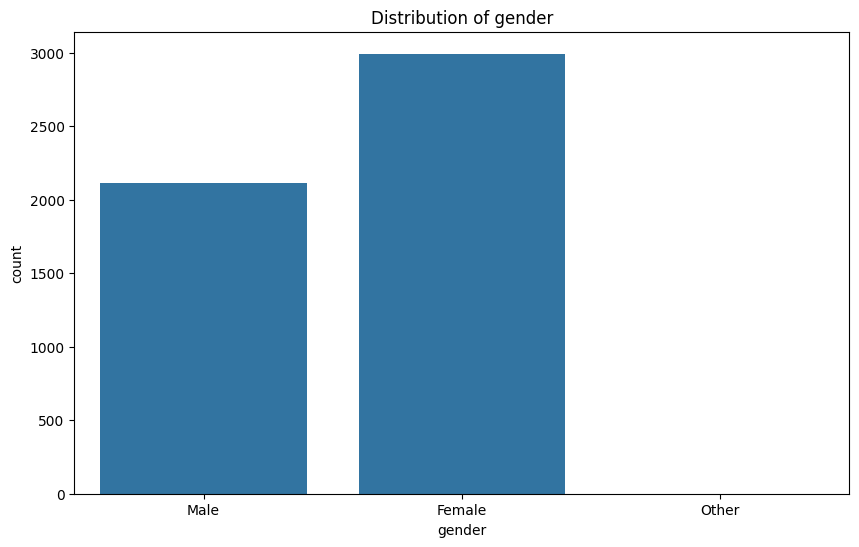

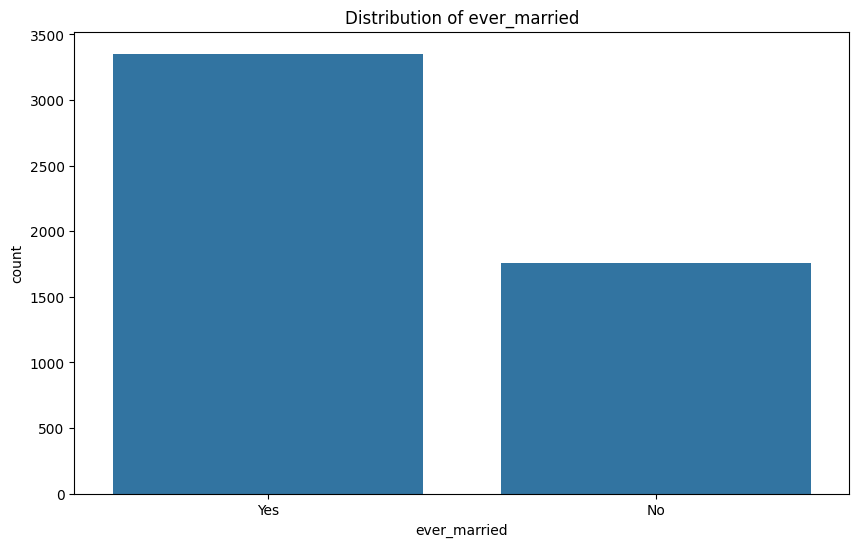

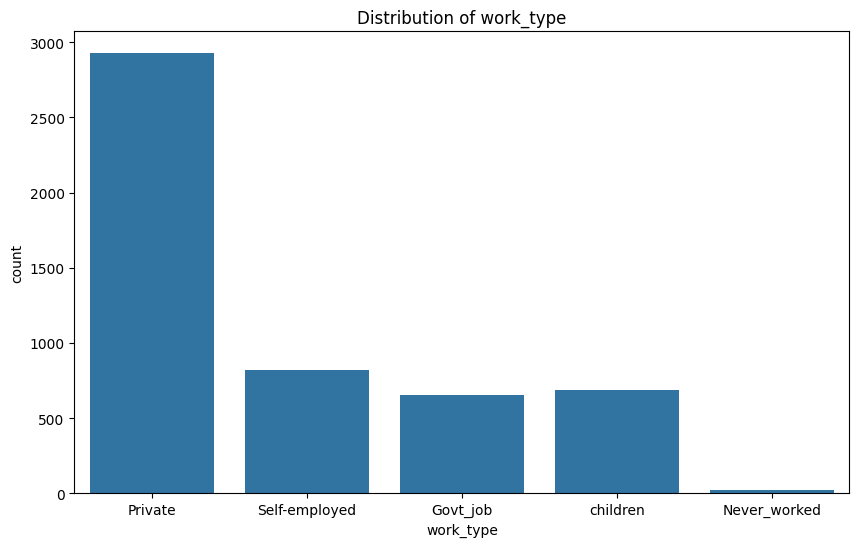

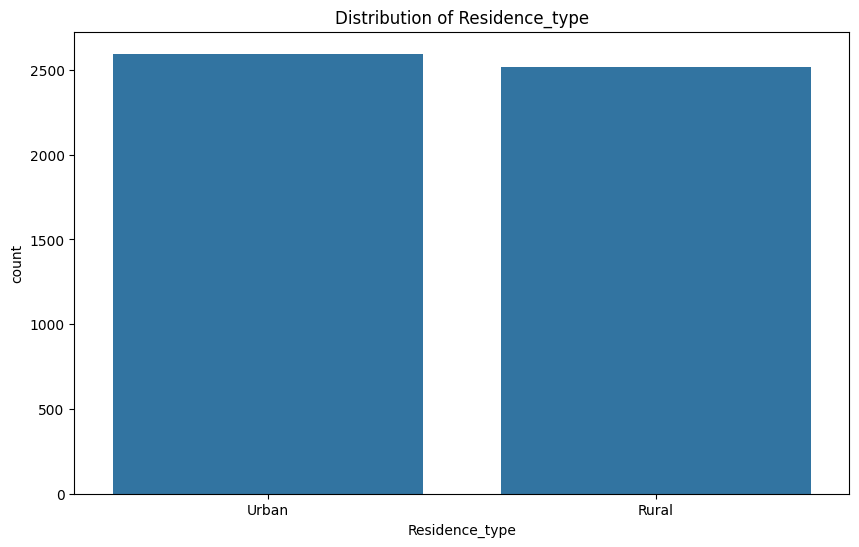

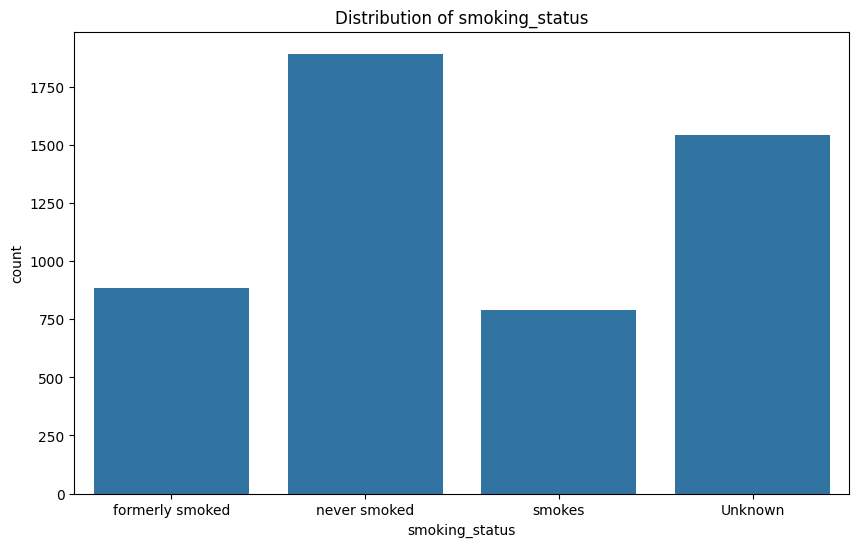

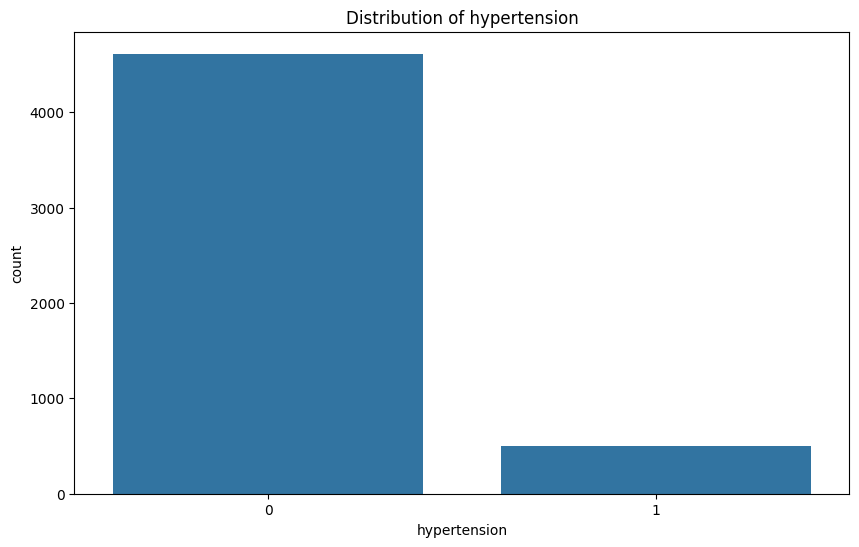

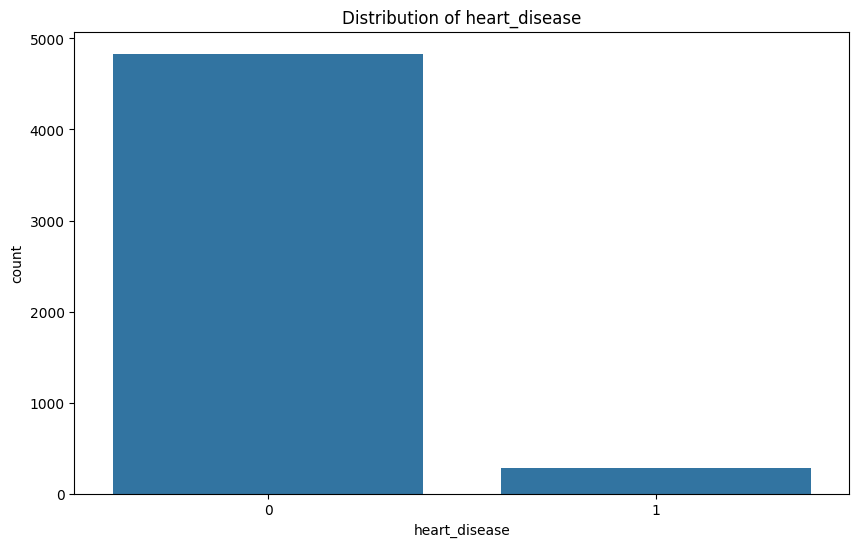

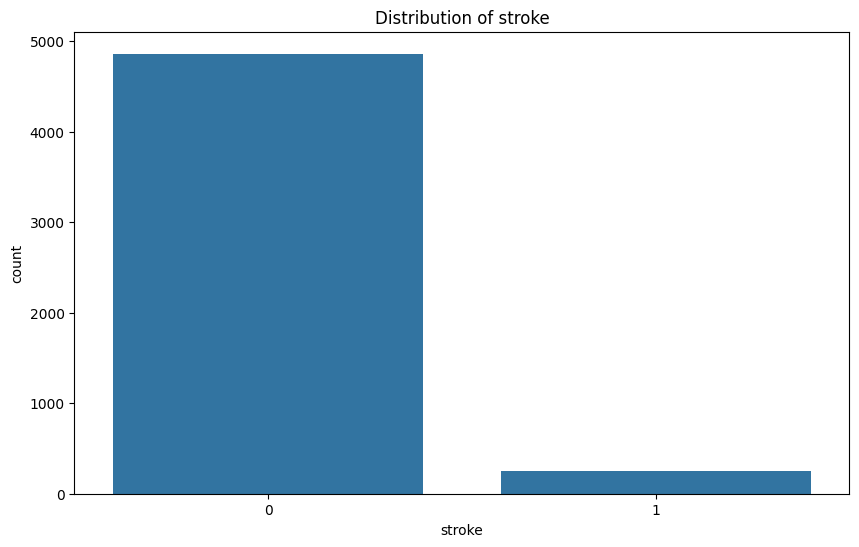

In [32]:
for feature in disc_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f"Distribution of {feature}")



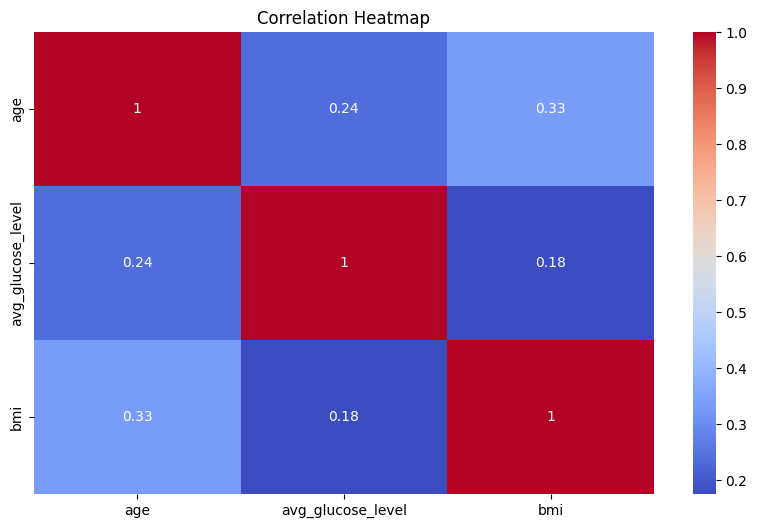

In [33]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[cont_features].corr(), cbar=True, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [19]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [36]:
# Handle missing values
df['bmi'].fillna(df['bmi'].mean(), inplace=True)

# Convert categorical columns using one-hot encoding
df = pd.get_dummies(df, cat_features, drop_first=True)

# Ensure binary columns are represented as 1 and 0
binary_columns = ['gender_Male', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
for col in binary_columns:
    df[col] = df[col].astype(int)

print(df)

ValueError: Length of 'prefix' (5) did not match the length of the columns being encoded (0).

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Internship/healthcare-dataset-stroke-data.csv')
data.info()

# Handle missing values
data['bmi'].fillna(data['bmi'].mean(), inplace=True)
data['smoking_status'].fillna('Unknown', inplace=True)

# Convert categorical columns using one-hot encoding
data = pd.get_dummies(data, columns=['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

# Ensure binary columns are represented as 1 and 0
binary_columns = ['gender_Male', 'ever_married_Yes', 'work_type_Never_worked', 'work_type_Private', 'work_type_Self-employed', 'work_type_children', 'Residence_type_Urban', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
for col in binary_columns:
    data[col] = data[col].astype(int)

print(data)
# Create new features
bins = [0, 30, 50, 70, 100]
labels = ['0-30', '31-50', '51-70', '71-100']
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)
data = pd.get_dummies(data, columns=['age_group'], drop_first=True)

# Ensure age_group binary columns are represented as 1 and 0
age_group_columns = ['age_group_31-50', 'age_group_51-70', 'age_group_71-100']
for col in age_group_columns:
    data[col] = data[col].astype(int)

# Normalize avg_glucose_level and bmi
data['avg_glucose_level'] = (data['avg_glucose_level'] - data['avg_glucose_level'].mean()) / data['avg_glucose_level'].max()
data['bmi'] = (data['bmi'] - data['bmi'].mean()) / data['bmi'].max()

# Drop irrelevant features
data.drop(['id'], axis=1, inplace=True)

# Display the cleaned dataset
print(data)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
         id   age  hypertension  heart_disease  avg_glucose_level        bmi  \
0      9046  67.0             0              1             228.69  36.600000 